In [1]:
import pandas as pd
df = pd.read_excel("C:\\Users\\sivashree\\Desktop\\Skillslash\\Project by Vikas\\Python Project\\IPL 2024 SOLD PLAYER DATA ANALYSIS.xlsx")
df.head()

,S_No,PLAYERS,NATIONALITY,TYPE,PRICE,TEAM
0,0,Avanish Rao Aravelly,Indian,Wicket-Keeper,2000000,CSK
1,1,Mustafizur Rahman,Overseas,Bowler,20000000,CSK
2,2,Daryl Mitchell,Overseas,All-Rounder,140000000,CSK
3,3,Sameer Rizvi,Indian,Batter,84000000,CSK
4,4,Rachin Ravindra,Overseas,All-Rounder,18000000,CSK


Project 1 (basic Python)

Basic Data Exploration

1.	How many players are there in total?

In [3]:
# Total number of players
total_players = len(df)
print("Total number of players:", total_players)

Total number of players: 332


2.	How many players are Indian vs Overseas?

In [4]:
# Count of Indian vs Overseas players
nationality_count = df['NATIONALITY'].value_counts()
print("Nationality Breakdown:\n", nationality_count)

Nationality Breakdown:
 NATIONALITY
Indian      216
Overseas    116
Name: count, dtype: int64


3.	What is the average price of all players?

In [5]:
# Average price of all players
average_price = df['PRICE'].mean()
print("Average Price of Players: ₹{:,.0f}".format(average_price))

Average Price of Players: ₹10,093,373


4.List all unique player types (e.g., Wicket-Keeper, Bowler).

In [6]:
# Unique player types
unique_types = df['TYPE'].unique()
print("Unique Player Types:", unique_types)

# Count of each type
type_counts = df['TYPE'].value_counts()
print("\nPlayer Type Counts:\n", type_counts)

Unique Player Types: ['Wicket-Keeper' 'Bowler' 'All-Rounder' 'Batter']

Player Type Counts:
 TYPE
Bowler           128
All-Rounder      114
Batter            53
Wicket-Keeper     37
Name: count, dtype: int64


5.Which team has the most players?

In [2]:
# Removing 'Un-Sold' players
df_filtered = df[df['TEAM'] != 'Un-Sold']

# Counting players per team 
team_counts = df_filtered['TEAM'].value_counts()
print("Number of Players in Each Team:\n", team_counts)

# Team with the most players
most_players_team = team_counts.idxmax()
print("\nTeam with the Most Players:", most_players_team)

Number of Players in Each Team:
 TEAM
KKR    10
DC      9
GT      8
MI      8
PK      8
CSK     6
LSG     6
RCB     6
SH      6
RR      5
Name: count, dtype: int64

Team with the Most Players: KKR


6. What is the total amount spent by each team on players?

In [3]:
# Total amount spent by each team 
team_spending = df[df['TEAM'] != 'Un-Sold'].groupby('TEAM')['PRICE'].sum().sort_values(ascending=False)
team_spending_formatted = team_spending.apply(lambda x: f"₹{x:,.2f}")

print("Total Amount Spent by Each Team:\n", team_spending_formatted)

Total Amount Spent by Each Team:
 TEAM
KKR    ₹313,500,000.00
SH     ₹308,000,000.00
CSK    ₹304,000,000.00
GT     ₹303,000,000.00
PK     ₹249,500,000.00
RCB    ₹204,000,000.00
DC     ₹190,500,000.00
MI     ₹167,000,000.00
RR     ₹143,000,000.00
LSG    ₹122,000,000.00
Name: PRICE, dtype: object


7.	Which team spent the most money overall?

In [10]:
# Excluding 'Un-Sold' team
df_sold = df[df['TEAM'] != 'Un-Sold']

# Total amount spent by each valid team
team_spending = df_sold.groupby('TEAM')['PRICE'].sum()

# Finding the top spender
top_team = team_spending.idxmax()
top_amount = team_spending.max()

print("Team that spent the most:", top_team)
print("Total amount spent: ₹{:,.0f}".format(top_amount))

Team that spent the most: KKR
Total amount spent: ₹313,500,000


8.	What is the average price of Indian players vs Overseas players?

In [11]:
# Average price of Indian vs Overseas players
avg_price_by_nationality = df.groupby('NATIONALITY')['PRICE'].mean()
print("Average Price by Nationality:\n", avg_price_by_nationality)

Average Price by Nationality:
 NATIONALITY
Indian      5.400463e+06
Overseas    1.883190e+07
Name: PRICE, dtype: float64


9.	How many players of each type are there (e.g., how many Bowlers, Batters)?

In [5]:
# Counting players by TYPE
player_type_counts = df['TYPE'].value_counts()

print("Number of Players by Each Type:\n")
print(player_type_counts)

Number of Players by Each Type:

TYPE
Bowler           128
All-Rounder      114
Batter            53
Wicket-Keeper     37
Name: count, dtype: int64


10.	What is the average price of each type of player?

In [6]:
# Average price for each type of player
avg_price_by_type = df.groupby('TYPE')['PRICE'].mean().sort_values(ascending=False)
print("Average Price by Player Type:\n", avg_price_by_type)

Average Price by Player Type:
 TYPE
Batter           1.166981e+07
Bowler           1.051172e+07
All-Rounder      9.934211e+06
Wicket-Keeper    6.878378e+06
Name: PRICE, dtype: float64


Filtering and Sorting

11.	List all players who were bought for more than ₹5 crores (50,000,000)

In [14]:
# Players bought for more than ₹5 crores
high_value_players = df[df['PRICE'] > 50000000]
print("Players bought for more than ₹5 crores:\n")
high_value_players[['PLAYERS', 'PRICE', 'TEAM']]

Players bought for more than ₹5 crores:



,PLAYERS,PRICE,TEAM
2,Daryl Mitchell,140000000,CSK
3,Sameer Rizvi,84000000,CSK
12,Kumar Kushagra,72000000,DC
16,Spencer Johnson,100000000,GT
21,Shahrukh Khan,74000000,GT
22,Umesh Yadav,58000000,GT
27,Mitchell Starc,247500000,KKR
36,Shivam Mavi,64000000,LSG
52,Rilee Rossouw,80000000,PK
54,Harshal Patel,117500000,PK


12.	Who is the most expensive player in the dataset?

In [15]:
# Most expensive player
max_price = df['PRICE'].max()
most_expensive_player = df[df['PRICE'] == max_price]

print("Most Expensive Player:\n")
most_expensive_player[['PLAYERS', 'NATIONALITY', 'TYPE', 'PRICE', 'TEAM']]

Most Expensive Player:



,PLAYERS,NATIONALITY,TYPE,PRICE,TEAM
27,Mitchell Starc,Overseas,Bowler,247500000,KKR


13.	Which team has the most overseas players?

In [16]:
# Filtering only overseas players
overseas_players = df[df['NATIONALITY'] != 'Indian']

# Count of overseas players by team
overseas_count_by_team = overseas_players['TEAM'].value_counts()

print("Overseas Players by Team:\n", overseas_count_by_team)

# Team with most overseas players
top_overseas_team = overseas_count_by_team.idxmax()
top_overseas_count = overseas_count_by_team.max()

print(f"\nTeam with the most overseas players: {top_overseas_team} ({top_overseas_count} players)")

Overseas Players by Team:
 TEAM
Un-Sold    86
DC          4
KKR         4
MI          4
CSK         3
RR          3
RCB         3
SH          3
GT          2
LSG         2
PK          2
Name: count, dtype: int64

Team with the most overseas players: Un-Sold (86 players)


14.	List all Wicket-Keepers and their respective teams and prices

In [17]:
# Listing of all Wicket-Keepers with their team and price
wicket_keepers = df[df['TYPE'] == 'Wicket-Keeper'][['PLAYERS', 'TEAM', 'PRICE']]
print("Wicket-Keepers and their Teams & Prices:\n")
wicket_keepers

Wicket-Keepers and their Teams & Prices:



,PLAYERS,TEAM,PRICE
0,Avanish Rao Aravelly,CSK,2000000
6,Ricky Bhui,DC,2000000
10,Shai Hope,DC,7500000
12,Kumar Kushagra,DC,72000000
13,Tristan Stubbs,DC,5000000
18,Robin Minz,GT,36000000
30,K.S. Bharat,KKR,5000000
59,Tom Kohler-Cadmore,RR,4000000
80,Urvil Patel,Un-Sold,2000000
81,Vishnu Solanki,Un-Sold,2000000


15.	Find the top 3 most expensive Indian players

In [18]:
# Top 3 most expensive Indian players
top_indian_players = df[df['NATIONALITY'] == 'Indian'].sort_values(by='PRICE', ascending=False).head(3)
print("Top 3 Most Expensive Indian Players:\n")
top_indian_players[['PLAYERS', 'PRICE', 'TEAM']]

Top 3 Most Expensive Indian Players:



,PLAYERS,PRICE,TEAM
54,Harshal Patel,117500000,PK
3,Sameer Rizvi,84000000,CSK
21,Shahrukh Khan,74000000,GT


16.	Which team spent the most per player on average?

In [19]:
# Removing "Un-Sold" if present
df_valid = df[df['TEAM'] != 'Un-Sold']

# Average amount spent per player by team
avg_spend_per_player = df_valid.groupby('TEAM')['PRICE'].mean().sort_values(ascending=False)

print("Average Spend per Player by Team:\n", avg_spend_per_player)

# Team that spent the most per player
top_avg_team = avg_spend_per_player.idxmax()
top_avg_value = avg_spend_per_player.max()

print(f"\nTeam with the highest average spend per player: {top_avg_team} (₹{top_avg_value:,.0f})")

Average Spend per Player by Team:
 TEAM
SH     5.133333e+07
CSK    5.066667e+07
GT     3.787500e+07
RCB    3.400000e+07
KKR    3.135000e+07
PK     3.118750e+07
RR     2.860000e+07
DC     2.116667e+07
MI     2.087500e+07
LSG    2.033333e+07
Name: PRICE, dtype: float64

Team with the highest average spend per player: SH (₹51,333,333)


17.	Create a summary showing the number of players by type for each team

In [20]:
# Summary: number of players by type for each team
player_type_summary = df[df['TEAM'] != 'Un-Sold'].pivot_table(index='TEAM', columns='TYPE', values='PLAYERS', aggfunc='count', fill_value=0)

print("Player Type Summary by Team:\n")
player_type_summary

Player Type Summary by Team:



TYPE,All-Rounder,Batter,Bowler,Wicket-Keeper
TEAM,,,,
CSK,3,1,1,1
DC,1,2,2,4
GT,2,0,5,1
KKR,1,3,5,1
LSG,3,1,2,0
MI,5,0,3,0
PK,5,2,1,0
RCB,2,1,3,0
RR,1,2,1,1


18.	Calculate the percentage of overseas players in each team.

In [21]:
# Filtering out 'Un-Sold' players
df_valid = df[df['TEAM'] != 'Un-Sold']

# Total players per team
total_players = df_valid.groupby('TEAM')['PLAYERS'].count()

# Overseas players per team
overseas_players = df_valid[df_valid['NATIONALITY'] != 'Indian'].groupby('TEAM')['PLAYERS'].count()

# Calculating percentage
overseas_percentage = (overseas_players / total_players * 100).round(2).sort_values(ascending=False)

print("Percentage of Overseas Players per Team:\n")
print(overseas_percentage)

Percentage of Overseas Players per Team:

TEAM
RR     60.00
CSK    50.00
MI     50.00
RCB    50.00
SH     50.00
DC     44.44
KKR    40.00
LSG    33.33
GT     25.00
PK     25.00
Name: PLAYERS, dtype: float64


19.	Who is the cheapest overseas player?

In [22]:
# Filtering only overseas players
overseas_players = df[df['NATIONALITY'] != 'Indian']

# Finding the cheapest overseas player
min_price = overseas_players['PRICE'].min()
cheapest_overseas = overseas_players[overseas_players['PRICE'] == min_price]

print("Cheapest Overseas Player:\n")
cheapest_overseas[['PLAYERS', 'TEAM', 'TYPE', 'PRICE']]

Cheapest Overseas Player:



,PLAYERS,TEAM,TYPE,PRICE
235,Jake Fraser-Mcgurk,Un-Sold,All-Rounder,2000000
236,Duan Jansen,Un-Sold,All-Rounder,2000000
237,Prenelan Subrayen,Un-Sold,All-Rounder,2000000
238,William Salzmann,Un-Sold,Wicket-Keeper,2000000
239,Ottneil Baartman,Un-Sold,Bowler,2000000
240,Shamar Joseph,Un-Sold,Bowler,2000000
241,Kwena Maphaka,Un-Sold,Bowler,2000000
242,William O'Rourke,Un-Sold,Bowler,2000000
243,Paul Van Meekeren,Un-Sold,Bowler,2000000
244,Chris Wood,Un-Sold,Bowler,2000000


20.	Visualize the distribution of player prices using a box plot or histogram

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

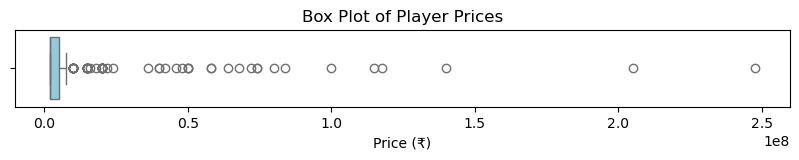

In [24]:
plt.figure(figsize=(10, 1))
sns.boxplot(data=df, x='PRICE', color='skyblue')
plt.title("Box Plot of Player Prices")
plt.xlabel("Price (₹)")
plt.show()

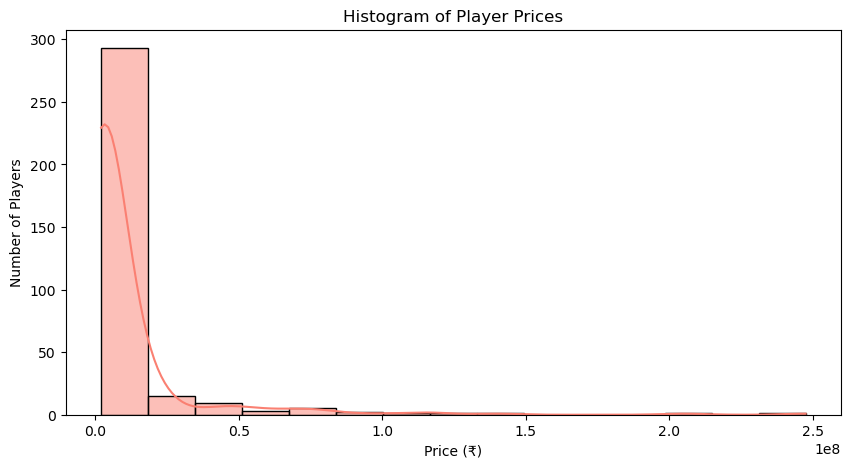

In [25]:
plt.figure(figsize=(10, 5))
sns.histplot(df['PRICE'], bins=15, kde=True, color='salmon')
plt.title("Histogram of Player Prices")
plt.xlabel("Price (₹)")
plt.ylabel("Number of Players")
plt.show()

Project 2 (Python + Stats)

Basic Exploration

In [26]:
df = pd.read_excel("C:\\Users\\sivashree\\Desktop\\Skillslash\\Project by Vikas\\Python Project\\matches_2008-2024.xlsx")
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


1.	How many matches were played in each city?

In [27]:
matches_per_city = df['city'].value_counts()
print("Matches played in each city:\n")
print(matches_per_city)

Matches played in each city:

city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Durban             15
Visakhapatnam      15
Lucknow            14
Dubai              13
Dharamsala         13
Centurion          12
Rajkot             10
Sharjah            10
Indore              9
Navi Mumbai         9
Johannesburg        8
Cuttack             7
Port Elizabeth      7
Ranchi              7
Cape Town           7
Raipur              6
Mohali              5
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Guwahati            3
Nagpur              3
Bloemfontein        2
Name: count, dtype: int64


2.	What is the average target score across all matches?

In [28]:
avg_target = df['target_runs'].mean()
print(f"Average target score across all matches: {avg_target:.2f}")

Average target score across all matches: 165.68


3.	How many matches did each team win?

team_wins = df['winner'].value_counts()
print("Number of matches won by each team:\n")
print(team_wins)

4.	Which player won the most "Player of the Match" awards?

In [29]:
top_player = df['player_of_match'].value_counts().idxmax()
top_awards = df['player_of_match'].value_counts().max()

print(f"The player with the most 'Player of the Match' awards is: {top_player}")
print(f"Total awards: {top_awards}")

The player with the most 'Player of the Match' awards is: AB de Villiers
Total awards: 25


5.	Which venue hosted the most matches?

In [30]:
top_venue = df['venue'].value_counts().idxmax()
venue_matches = df['venue'].value_counts().max()

print(f"The venue that hosted the most matches is: {top_venue}")
print(f"Number of matches hosted: {venue_matches}")

The venue that hosted the most matches is: Eden Gardens
Number of matches hosted: 77


Statistics & Aggregation

6.	What is the mean, median, and standard deviation of result_margin for matches won by runs?

In [31]:
# Filtering matches won by runs
won_by_runs = df[df['result'] == 'runs']

# Calculating statistics
mean_margin = won_by_runs['result_margin'].mean()
median_margin = won_by_runs['result_margin'].median()
std_margin = won_by_runs['result_margin'].std()

print(f"Mean margin (runs): {mean_margin:.2f}")
print(f"Median margin (runs): {median_margin}")
print(f"Standard Deviation (runs): {std_margin:.2f}")

Mean margin (runs): 30.10
Median margin (runs): 22.0
Standard Deviation (runs): 26.74


7.	What is the correlation between target_runs and result_margin (for matches won by runs only)?

In [32]:
# Filtering for matches won by runs
won_by_runs = df[df['result'] == 'runs']

# Correlation between target_runs and result_margin
correlation = won_by_runs['target_runs'].corr(won_by_runs['result_margin'])

print(f"Correlation between target score and win margin (runs): {correlation:.3f}")

Correlation between target score and win margin (runs): 0.361


8.	Calculate the win percentage of each team.

In [33]:
# Total matches played per team
matches_played = df['team1'].value_counts() + df['team2'].value_counts()
# Total matches won per team
matches_won = df['winner'].value_counts()

# Win percentage
win_percentage = (matches_won / matches_played * 100).round(2)

print("Win Percentage by Team:\n")
print(win_percentage.sort_values(ascending=False))


Win Percentage by Team:

Rising Pune Supergiant         62.50
Gujarat Titans                 62.22
Chennai Super Kings            57.98
Mumbai Indians                 55.17
Lucknow Super Giants           54.55
Delhi Capitals                 52.75
Kolkata Knight Riders          52.19
Rajasthan Royals               50.68
Sunrisers Hyderabad            48.35
Royal Challengers Bangalore    48.33
Royal Challengers Bengaluru    46.67
Kings XI Punjab                46.32
Gujarat Lions                  43.33
Kochi Tuskers Kerala           42.86
Punjab Kings                   42.86
Delhi Daredevils               41.61
Deccan Chargers                38.67
Rising Pune Supergiants        35.71
Pune Warriors                  26.09
Name: count, dtype: float64


9.	What is the distribution of matches won by wickets vs. by runs?

In [34]:
# Counting how many matches were won by runs vs wickets
win_distribution = df['result'].value_counts()

print("Distribution of matches won by:\n")
print(win_distribution)

Distribution of matches won by:

result
wickets      578
runs         498
tie           14
no result      5
Name: count, dtype: int64


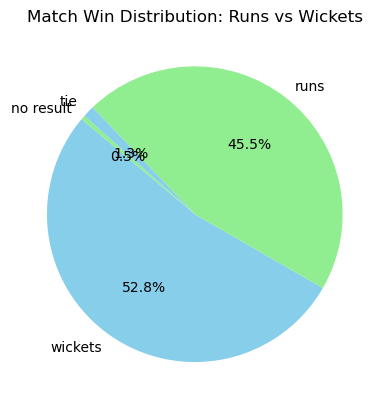

In [35]:
win_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=140)
plt.title("Match Win Distribution: Runs vs Wickets")
plt.ylabel("")  # Hide y-axis label
plt.show()

10.	Is there a significant difference in the average target score when the toss decision is "bat" vs "field"?

In [36]:
# Group by toss decision and calculate average target score
avg_target_by_toss = df.groupby('toss_decision')['target_runs'].mean().round(2)

print("Average Target Score by Toss Decision:\n")
print(avg_target_by_toss)


Average Target Score by Toss Decision:

toss_decision
bat      160.65
field    168.48
Name: target_runs, dtype: float64


Filtering & Grouping

11.	How many matches went into a super over?

In [37]:
super_over_matches = df[df['super_over'] == 'Yes']
print(f"Number of matches with a Super Over: {len(super_over_matches)}")

Number of matches with a Super Over: 0


In [38]:
super_over_matches[['city', 'date', 'team1', 'team2', 'winner']]

,city,date,team1,team2,winner


12.	Which umpires have officiated the most matches together (umpire1 & umpire2 pair)?

In [39]:
# Creating sorted tuple of umpire pairs (so (A, B) and (B, A) are treated the same)
umpire_pairs = df.apply(lambda row: tuple(sorted([row['umpire1'], row['umpire2']])), axis=1)

# Counting occurrences of each pair
umpire_pair_counts = umpire_pairs.value_counts()

#The most common pair
most_common_pair = umpire_pair_counts.idxmax()
most_common_count = umpire_pair_counts.max()

print(f"The most common umpire pair: {most_common_pair}")
print(f"Matches officiated together: {most_common_count}")

The most common umpire pair: ('C Shamshuddin', 'S Ravi')
Matches officiated together: 13


13.	Find the match with the highest result margin (by runs or wickets)

In [40]:
# Finding the match with the highest result margin
max_margin = df['result_margin'].max()
biggest_win = df[df['result_margin'] == max_margin]

print("Match with the highest result margin:\n")
print(biggest_win[['date', 'city', 'team1', 'team2', 'winner', 'result', 'result_margin']])

Match with the highest result margin:

          date   city             team1           team2          winner  \
620 2017-05-06  Delhi  Delhi Daredevils  Mumbai Indians  Mumbai Indians   

    result  result_margin  
620   runs          146.0  


14.	Which toss decision (bat/field) led to more wins?

In [41]:
# Filtering where toss winner also won the match
toss_win_and_match_win = df[df['toss_winner'] == df['winner']]

# Counting toss decisions in those matches
decision_success = toss_win_and_match_win['toss_decision'].value_counts()

print("Wins based on toss decision:\n")
print(decision_success)

Wins based on toss decision:

toss_decision
field    377
bat      177
Name: count, dtype: int64


15.	Which teams have the highest win ratio when winning the toss?

In [42]:
# Total tosses won per team
toss_wins = df['toss_winner'].value_counts()

# Matches where toss winner also won the match
match_and_toss_wins = df[df['toss_winner'] == df['winner']]['toss_winner'].value_counts()

# Win ratio
toss_win_ratio = (match_and_toss_wins / toss_wins * 100).round(2)

print("Win Ratio After Winning Toss (in %):\n")
print(toss_win_ratio.sort_values(ascending=False))

Win Ratio After Winning Toss (in %):

toss_winner
Rising Pune Supergiant         83.33
Gujarat Lions                  66.67
Gujarat Titans                 63.64
Chennai Super Kings            61.48
Kolkata Knight Riders          55.74
Mumbai Indians                 54.55
Lucknow Super Giants           52.63
Delhi Capitals                 52.00
Royal Challengers Bangalore    50.44
Kochi Tuskers Kerala           50.00
Rajasthan Royals               50.00
Royal Challengers Bengaluru    50.00
Deccan Chargers                44.19
Delhi Daredevils               43.75
Sunrisers Hyderabad            43.18
Rising Pune Supergiants        42.86
Kings XI Punjab                42.35
Punjab Kings                   37.50
Pune Warriors                  15.00
Name: count, dtype: float64


Project 3 (Python + ML)

In [3]:
df = pd.read_excel("C:\\Users\\sivashree\\Desktop\\Skillslash\\Project by Vikas\\Python Project\\deliveries_2008-2024.xlsx")
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


🔄 Feature Engineering / Data Preparation

1.	How would you preprocess this ball-by-ball data to predict the final score of an inning?

In [4]:
# Basic per-over stats
over_summary = df.groupby(['match_id', 'inning', 'over']).agg(
    runs_in_over=('total_runs', 'sum'),
    wickets_in_over=('is_wicket', 'sum'),
    boundaries=('batsman_runs', lambda x: ((x == 4) | (x == 6)).sum()),
    extras_in_over=('extra_runs', 'sum')
).reset_index()

# Cumulative stats
over_summary['cumulative_runs'] = over_summary.groupby(['match_id', 'inning'])['runs_in_over'].cumsum()
over_summary['cumulative_wickets'] = over_summary.groupby(['match_id', 'inning'])['wickets_in_over'].cumsum()

# Momentum feature (runs in last 2 overs)
over_summary['runs_last_2_overs'] = (
    over_summary.groupby(['match_id', 'inning'])['runs_in_over']
    .rolling(window=2, min_periods=1).sum().reset_index(drop=True)
)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Filtering only overs up to a certain point (e.g., first 15 overs)
data = over_summary.copy()
final_scores = data.groupby(['match_id', 'inning'])['cumulative_runs'].max().reset_index()
final_scores.rename(columns={'cumulative_runs': 'final_score'}, inplace=True)

# Merging to get final score on each row
data = data.merge(final_scores, on=['match_id', 'inning'])

# Selecting features and target
features = ['over', 'runs_in_over', 'wickets_in_over', 'boundaries', 'extras_in_over', 
            'cumulative_runs', 'cumulative_wickets', 'runs_last_2_overs']
target = 'final_score'

# Filtering rows only for early overs (e.g., first 10)
data_model = data[data['over'] <= 10]  # Can tune to 5, 6, 8 overs, etc.

# Train-test split
X = data_model[features]
y = data_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Training a regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
#Evaluating the model
y_pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 22.754854736840304
R² Score: 0.1370004597820208


2.	Can you create features like “strike rate” or “bowler economy rate” from this data? How?

In [8]:
# 🏏 STRIKE RATE (per batter)

# Filter valid balls (exclude wides and no-balls)
valid_balls = df[df['extras_type'].isnull()]

# Group by batter to calculate total runs and balls faced
strike_rate_df = valid_balls.groupby('batter').agg(
    total_runs=('batsman_runs', 'sum'),
    balls_faced=('ball', 'count')
).reset_index()

# Calculating strike rate = (runs / balls) * 100
strike_rate_df['strike_rate'] = (strike_rate_df['total_runs'] / strike_rate_df['balls_faced']) * 100

# Sort by highest strike rate
strike_rate_df.sort_values(by='strike_rate', ascending=False, inplace=True)

# Shows top 10
print("🏏 Top 10 Batters by Strike Rate:")
print(strike_rate_df[['batter', 'strike_rate']].head(10))

🏏 Top 10 Batters by Strike Rate:
              batter  strike_rate
312           L Wood   300.000000
461    R Sai Kishore   260.000000
293  KMDN Kulasekara   250.000000
97        B Stanlake   250.000000
234  J Fraser-McGurk   238.235294
629         Umar Gul   229.411765
478       RJ Gleeson   200.000000
640        VRV Singh   200.000000
497         RS Sodhi   200.000000
465       R Shepherd   191.666667


3.	Build a dataset where each row represents an over. What features would you include?

In [9]:
# Group data to get per-over features
over_df = df.groupby(['match_id', 'inning', 'over']).agg(
    batting_team=('batting_team', 'first'),
    bowling_team=('bowling_team', 'first'),
    runs_in_over=('total_runs', 'sum'),
    wickets_in_over=('is_wicket', 'sum'),
    extras_in_over=('extra_runs', 'sum'),
    boundaries=('batsman_runs', lambda x: ((x == 4) | (x == 6)).sum()),
    dot_balls=('batsman_runs', lambda x: (x == 0).sum()),
    batsmen_involved=('batter', lambda x: x.nunique()),
    bowler_involved=('bowler', lambda x: x.nunique())
).reset_index()

In [10]:
# Adding cumulative stats per match and inning
over_df['cumulative_runs'] = over_df.groupby(['match_id', 'inning'])['runs_in_over'].cumsum()

In [11]:
# Momentum: Runs in the last 2 overs
over_df['momentum_last_2_overs'] = (
    over_df.groupby(['match_id', 'inning'])['runs_in_over']
    .rolling(window=2, min_periods=1).sum().reset_index(drop=True)
)

In [12]:
over_df.head()

,match_id,inning,over,batting_team,bowling_team,runs_in_over,wickets_in_over,extras_in_over,boundaries,dot_balls,batsmen_involved,bowler_involved,cumulative_runs,momentum_last_2_overs
0,335982,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,3,0,3,0,7,2,1,3,3.0
1,335982,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,18,0,0,4,2,1,1,21,21.0
2,335982,1,2,Kolkata Knight Riders,Royal Challengers Bangalore,6,0,1,1,4,2,1,27,24.0
3,335982,1,3,Kolkata Knight Riders,Royal Challengers Bangalore,23,0,6,3,3,2,1,50,29.0
4,335982,1,4,Kolkata Knight Riders,Royal Challengers Bangalore,10,0,0,2,2,2,1,60,33.0


4.	How would you detect and handle outliers in batsman_runs or total_runs?

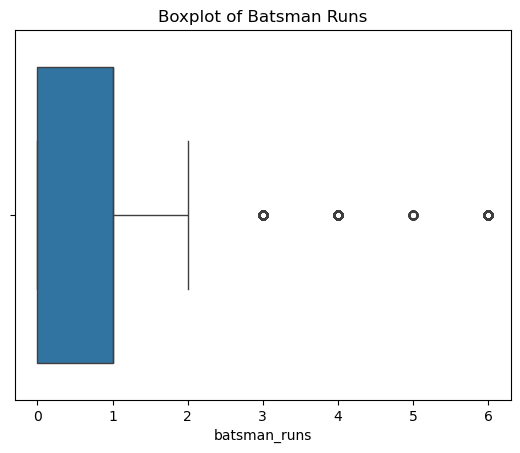

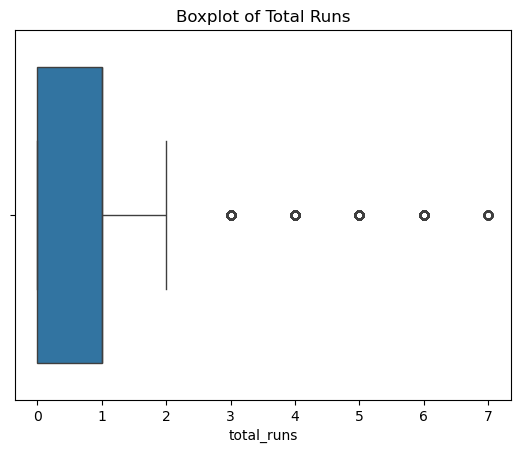

In [13]:
#Detecting Outliers
#📌 A. Using Boxplot / IQR Method
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to visually check outliers
sns.boxplot(x=df['batsman_runs'])
plt.title('Boxplot of Batsman Runs')
plt.show()

sns.boxplot(x=df['total_runs'])
plt.title('Boxplot of Total Runs')
plt.show()

In [14]:
# Removing Outliers----using batsman_runs
Q1 = df['batsman_runs'].quantile(0.25)
Q3 = df['batsman_runs'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Keeping only non-outliers
df_cleaned = df[(df['batsman_runs'] >= lower) & (df['batsman_runs'] <= upper)]

print("Shape before:", df.shape)
print("Shape after:", df_cleaned.shape)

Shape before: (260920, 17)
Shape after: (217171, 17)


5.	Engineer a feature that captures momentum (e.g., runs scored in the last 2 overs). How would you implement it in Pandas?

In [15]:
# Aggregating total runs per over
over_runs = df.groupby(['match_id', 'inning', 'over'])['total_runs'].sum().reset_index()

#Sorting to ensure proper order for rolling calculation
over_runs = over_runs.sort_values(by=['match_id', 'inning', 'over'])

#Calculating runs in last 2 overs using groupby + transform (this keeps the index aligned!)
over_runs['runs_last_2_overs'] = (
    over_runs
    .groupby(['match_id', 'inning'])['total_runs']
    .transform(lambda x: x.shift(1).rolling(window=2, min_periods=1).sum())
)

print(over_runs.head(10))

   match_id  inning  over  total_runs  runs_last_2_overs
0    335982       1     0           3                NaN
1    335982       1     1          18                3.0
2    335982       1     2           6               21.0
3    335982       1     3          23               24.0
4    335982       1     4          10               29.0
5    335982       1     5           1               33.0
6    335982       1     6           7               11.0
7    335982       1     7           5                8.0
8    335982       1     8           4               12.0
9    335982       1     9          10                9.0


Supervised Learning

6.	Build a regression model to predict the final inning total using data available till a certain over. 
Which regression algorithms would you try (Linear Regression, XGBoost, etc.)?

In [16]:
# Choosing a Cutoff Over
cutoff_over = 10

In [17]:
#Computing Total Runs Scored After Cutoff Over (This is the TARGET)
final_totals = df.groupby(['match_id', 'inning'])['total_runs'].sum().reset_index()
final_totals.rename(columns={'total_runs': 'final_total'}, inplace=True)

In [18]:
#Aggregating Data Till the Cutoff Over (This is the FEATURE)
df_cutoff = df[df['over'] <= cutoff_over]

till_now = df_cutoff.groupby(['match_id', 'inning'])['total_runs'].sum().reset_index()
till_now.rename(columns={'total_runs': 'runs_till_cutoff'}, inplace=True)

In [19]:
#Merge Feature and Target
model_df = pd.merge(till_now, final_totals, on=['match_id', 'inning'])

In [20]:
# Spliting into Features and Target
X = model_df[['runs_till_cutoff']]   # features
y = model_df['final_total']          # target

In [21]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
 #Trying Regression Models
 from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [23]:
#Evaluating the Models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_test, y_pred, name):
    print(f"\n{name} Performance:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score:", r2_score(y_test, y_pred))
    
evaluate_model(y_test, y_pred_rf, "Random Forest")


Random Forest Performance:
MAE: 18.90745398382032
RMSE: 25.134048762967055
R2 Score: 0.5549065625896638


7.	Can you train a classification model to predict whether a team will score more than 180 runs in an inning?
What would your target and features be?

In [24]:
# Creating Target (Will Score > 180 Runs?)
# Step 2: Get final total of each inning
inning_totals = df.groupby(['match_id', 'inning'])['total_runs'].sum().reset_index()

# Creating binary target (1 = yes, 0 = no)
inning_totals['target'] = (inning_totals['total_runs'] > 180).astype(int)

In [25]:
#  Filtering data till over 10
df_cutoff = df[df['over'] <= 10]

# Creating features per inning
features = df_cutoff.groupby(['match_id', 'inning']).agg({
    'total_runs': 'sum',
    'ball': 'count',
    'batsman_runs': 'mean',
    'bowler': 'nunique',
    'over': 'max'
}).reset_index()

# Renaming for clarity
features.rename(columns={
    'total_runs': 'runs_till_over_10',
    'ball': 'balls_played',
    'batsman_runs': 'avg_batsman_runs',
    'bowler': 'unique_bowlers'
}, inplace=True)


In [26]:
#Merging Target with Features
#Combining features with target
df_model = features.merge(inning_totals[['match_id', 'inning', 'target']], on=['match_id', 'inning'])

In [27]:
#Training a Classification Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

#Defining X (features) and y (target)
X = df_model.drop(['match_id', 'inning', 'target'], axis=1)
y = df_model['target']

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

#Prediction and evaluating
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.777027027027027
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       357
           1       0.44      0.49      0.46        87

    accuracy                           0.78       444
   macro avg       0.66      0.67      0.66       444
weighted avg       0.79      0.78      0.78       444



8.	Train a model to predict whether a wicket will fall on a given ball. Which features are most predictive?

In [28]:
#Selecting features and target
df_model = df[['over', 'ball', 'total_runs', 'batter', 'bowler', 'batting_team', 'bowling_team', 'is_wicket']].copy()

In [29]:
# One-Hot Encode Categorical Columns
df_model_encoded = pd.get_dummies(
    df_model, 
    columns=['batter', 'bowler', 'batting_team', 'bowling_team'], 
    drop_first=True
)

In [30]:
#Spliting into Features and Target
X = df_model_encoded.drop('is_wicket', axis=1)
y = df_model_encoded['is_wicket']

In [31]:
# Train-Test Split + Model Training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
#Evaluating
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9455388624865859
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     49632
           1       0.17      0.03      0.05      2552

    accuracy                           0.95     52184
   macro avg       0.56      0.51      0.51     52184
weighted avg       0.91      0.95      0.93     52184



9.	Create a model to predict the next ball’s runs (0, 1, 2, 4, 6). 
Which model performs best: Random Forest, Logistic Regression, or Gradient Boosting?

In [33]:
import pandas as pd

# Filtering only the rows where batsman_runs are 0, 1, 2, 4, or 6
df_runs = df[df['batsman_runs'].isin([0, 1, 2, 4, 6])].copy()

# Selecting features and target
df_model = df_runs[['over', 'ball', 'batsman_runs', 'batter', 'bowler', 'batting_team', 'bowling_team']]

In [34]:
# One-hot encode the categorical variables
X = pd.get_dummies(df_model.drop('batsman_runs', axis=1), drop_first=True)
y = df_model['batsman_runs']

In [35]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Trying Different Models
#🔹 Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

Random Forest:
               precision    recall  f1-score   support

           0       0.44      0.51      0.48     20853
           1       0.44      0.40      0.42     19237
           2       0.09      0.08      0.08      3271
           4       0.14      0.12      0.13      5989
           6       0.11      0.09      0.10      2665

    accuracy                           0.38     52015
   macro avg       0.24      0.24      0.24     52015
weighted avg       0.37      0.38      0.37     52015



In [ ]:
#🔹 Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Scaling data for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000, solver='saga', n_jobs=-1)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))

In [ ]:
#🔹 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting:\n", classification_report(y_test, y_pred_gb))

In [ ]:
# Comparing Model Performance
from sklearn.metrics import accuracy_score, f1_score

# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

# F1-score (weighted to handle class imbalance)
print("\nF1 Scores (weighted):")
print("Random Forest:", f1_score(y_test, y_pred_rf, average='weighted'))
print("Logistic Regression:", f1_score(y_test, y_pred_lr, average='weighted'))
print("Gradient Boosting:", f1_score(y_test, y_pred_gb, average='weighted'))

In [ ]:
#Confusion Matrix 
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

models_preds = {
    "Random Forest": y_pred_rf,
    "Lgistic Regression": y_pred_lr,
    "Gradient Boosting": y_pred_gb
}

for name, preds in models_preds.items():
    print(f"\n{name} Confusion Matrix:")
    disp = ConfusionMatrixDisplay.from_predictions(y_test, preds)
    plt.title(f"{name} Confusion Matrix")
    plt.grid(False)
    plt.show()